In [71]:
import os
import sys
from datetime import datetime
from time import strftime
sys.path.append("../")
from data_loader import load_data,get_entire_data,get_features
from feature_engineering import cluster_two_features
# from feature_engineering import get_statistic_value

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler, KBinsDiscretizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [34]:
def get_statistic_value(df:pd.DataFrame, group:list, target:str="answerCode")->pd.DataFrame:
    """Get target`s mean, count, var, sum, median groupby group"""
    if type(group) == str:
        group = [group]
    # statistics = ["mean", "count", "sum", "var", "median"]
    statistics = ["mean"]
    new_df = df.groupby(group)[target].agg(statistics)
    new_df.columns = ["_".join(group+[target,i]) for i in statistics]
    return new_df

In [35]:
_train, _test = load_data()
_df = get_entire_data(_train, _test)
df = get_features(_df)

In [88]:
df.head()

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,userID_answerCode_mean,userID_answerCode_count,userID_answerCode_sum,userID_answerCode_var,...,hour_answerCode_mean,hour_answerCode_count,hour_answerCode_sum,hour_answerCode_var,hour_answerCode_Level,month_answerCode_mean,month_answerCode_count,month_answerCode_sum,month_answerCode_var,KnowledgeTag_first3_clust
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224,0.630872,745,470,0.233185,...,6.528572,110005,71546,0.227803,2,0.681427,189115,128868,0.217086,31
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225,0.630872,745,470,0.233185,...,6.528572,110005,71546,0.227803,2,0.681427,189115,128868,0.217086,31
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225,0.630872,745,470,0.233185,...,6.528572,110005,71546,0.227803,2,0.681427,189115,128868,0.217086,31
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225,0.630872,745,470,0.233185,...,6.528572,110005,71546,0.227803,2,0.681427,189115,128868,0.217086,31
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225,0.630872,745,470,0.233185,...,6.528572,110005,71546,0.227803,2,0.681427,189115,128868,0.217086,31


In [67]:
df.nunique()

userID                       7442
assessmentItemID             9454
testId                       1537
answerCode                      3
Timestamp                 2251346
                           ...   
hour_answerCode_Level           3
month_answerCode_mean          12
month_answerCode_count         12
month_answerCode_sum           12
month_answerCode_var           12
Length: 68, dtype: int64

In [89]:
for col in df.columns:
    if df[col].dtype==int:
        df[col] = df[col]-df[col].min()

In [91]:
df.dtypes

userID                                int64
assessmentItemID                     object
testId                               object
answerCode                            int64
Timestamp                    datetime64[ns]
                                  ...      
month_answerCode_mean               float64
month_answerCode_count                int64
month_answerCode_sum                  int64
month_answerCode_var                float64
KnowledgeTag_first3_clust             int32
Length: 69, dtype: object

In [4]:
sns.heatmap(df.corr())

NameError: name 'df' is not defined

In [ ]:
clst = []
for col in df.columns:
    if "sum" in col or "count" in col:
        clst.append(col)
clst

In [ ]:
clst = ["userID_answerCode_count","userID_answerCode_sum"]

In [ ]:
def plot_cluster(a, b, n_cluster=5):
    fig = plt.figure()
    scaler = StandardScaler()
    model = KMeans(n_clusters=n_cluster,algorithm='lloyd')
    new_df = df[[a,b]]
    id_code = pd.DataFrame(scaler.fit_transform(new_df))
    id_code.columns = [a,b]
    model.fit(id_code)
    predict = pd.DataFrame(model.predict(id_code))
    predict.columns=['predict']
    plt.scatter(id_code[a],id_code[b],c=predict['predict'],alpha=0.5)
    centers = pd.DataFrame(model.cluster_centers_,columns=[a,b])
    center_x = centers[a]
    center_y = centers[b]
    plt.xlabel(a)
    plt.ylabel(b)
    plt.scatter(center_x,center_y,s=50,marker='D',c='r')
    plt.show()
    return predict['predict']

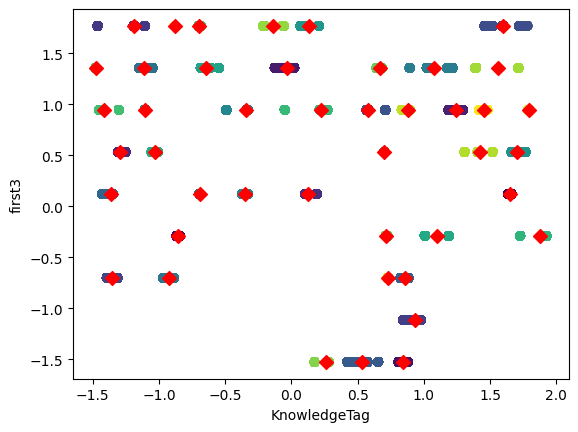

In [ ]:
users = plot_cluster("KnowledgeTag","first3",44)

In [ ]:
df["KnowledgeTag_first3_clust"] = users

In [ ]:
df

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,userID_answerCode_mean,userID_answerCode_count,userID_answerCode_sum,userID_answerCode_var,...,hour_answerCode_mean,hour_answerCode_count,hour_answerCode_sum,hour_answerCode_var,hour_answerCode_Level,month_answerCode_mean,month_answerCode_count,month_answerCode_sum,month_answerCode_var,KnowledgeTag_first3_clust
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224,0.630872,745,470,0.233185,...,0.650734,109982,71569,0.227281,2,0.681427,189115,128868,0.217086,24
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225,0.630872,745,470,0.233185,...,0.650734,109982,71569,0.227281,2,0.681427,189115,128868,0.217086,24
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225,0.630872,745,470,0.233185,...,0.650734,109982,71569,0.227281,2,0.681427,189115,128868,0.217086,24
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225,0.630872,745,470,0.233185,...,0.650734,109982,71569,0.227281,2,0.681427,189115,128868,0.217086,24
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225,0.630872,745,470,0.233185,...,0.650734,109982,71569,0.227281,2,0.681427,189115,128868,0.217086,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2475957,7441,A030071005,A030000071,0,2020-06-05 06:50:21,438,0.555556,9,5,0.277778,...,0.629034,182502,114800,0.233351,0,0.651950,248806,162209,0.226912,9
2475958,7441,A040165001,A040000165,1,2020-08-21 01:06:39,8836,0.555556,9,5,0.277778,...,0.644673,149454,96349,0.229071,1,0.656945,347093,228021,0.225369,26
2475959,7441,A040165002,A040000165,1,2020-08-21 01:06:50,8836,0.555556,9,5,0.277778,...,0.644673,149454,96349,0.229071,1,0.656945,347093,228021,0.225369,26
2475960,7441,A040165003,A040000165,1,2020-08-21 01:07:36,8836,0.555556,9,5,0.277778,...,0.644673,149454,96349,0.229071,1,0.656945,347093,228021,0.225369,26


In [ ]:
df.groupby("KnowledgeTag_first3_clust")["first3"].apply(set)

KnowledgeTag_first3_clust
0     {050}
1     {040}
2     {010}
3     {080}
4     {070}
5     {060}
6     {050}
7     {090}
8     {020}
9     {030}
10    {090}
11    {070}
12    {010}
13    {030}
14    {050}
15    {050}
16    {080}
17    {030}
18    {080}
19    {050}
20    {070}
21    {070}
22    {060}
23    {090}
24    {060}
25    {080}
26    {040}
27    {060}
28    {040}
29    {070}
30    {070}
31    {090}
32    {080}
33    {080}
34    {040}
35    {010}
36    {090}
37    {080}
38    {060}
39    {070}
40    {030}
41    {070}
42    {090}
43    {070}
Name: first3, dtype: object

In [ ]:
df.isna().sum()[df.isna().sum()>0]

userID_hour_answerCode_var         1113
userID_dayofweek_answerCode_var      20
user_correct_answer                7442
user_acc                           7442
dtype: int64

In [ ]:
low_importance = ['userID_dayofweek_answerCode_count', 'userID_month_answerCode_sum',
       'userID_dayofweek_answerCode_sum', 
       'user_total_answer', 'hour_answerCode_mean', 'hour_answerCode_count',
       'hour_answerCode_sum', 'hour_answerCode_var', 'month_answerCode_mean',
       'month_answerCode_count', 'month_answerCode_sum',
       'month_answerCode_var', 'userID_month_answerCode_count', 'userID',
       'KnowledgeTag_first3_answerCode_var',
       'KnowledgeTag_first3_answerCode_sum', 'userID_answerCode_count',
       'userID_answerCode_sum', 'testId_answerCode_count',
       'testId_answerCode_sum', 'assessmentItemID_answerCode_count',
       'KnowledgeTag_answerCode_mean', 'KnowledgeTag_answerCode_count',
       'KnowledgeTag_answerCode_sum', 'KnowledgeTag_answerCode_var', 'month',
       'hour', 'dayofweek', 'dayofweek_answerCode_mean',
       'dayofweek_answerCode_count', 'dayofweek_answerCode_sum', 'mid3',
       'last3', 'userID_first3_answerCode_count',
       'KnowledgeTag_first3_answerCode_mean',
       'KnowledgeTag_first3_answerCode_count', 'userID_first3_answerCode_sum']
def get_pca(df, cols, n_components):
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df[cols])
    pca = PCA(n_components=n_components)
    df_pca = pd.DataFrame(pca.fit_transform(df_scaled))
    df_pca.columns = ["pca_"+str(i) for i in range(n_components)]
    return df_pca
get_pca(df, low_importance, 10)

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9
0,-1.942245,1.664727,0.363048,-2.774042,0.579527,-3.394099,5.269778,-2.071701,1.506738,-1.244453
1,-2.785458,2.368309,1.782028,-2.140564,0.511954,-2.225705,3.208686,-0.773084,1.633057,-1.052010
2,-2.745740,2.349762,1.807803,-2.128576,0.515223,-2.183511,3.190057,-0.820972,1.598440,-0.863988
3,-2.706023,2.331215,1.833579,-2.116587,0.518492,-2.141317,3.171429,-0.868860,1.563823,-0.675965
4,-2.666306,2.312668,1.859354,-2.104598,0.521761,-2.099124,3.152800,-0.916747,1.529206,-0.487943
...,...,...,...,...,...,...,...,...,...,...
2475957,-2.667175,-4.043108,0.784204,0.031419,-1.037534,-0.537118,-0.389474,0.182314,1.400661,-0.050718
2475958,-2.843830,-4.227414,-1.656575,-0.015813,-0.476398,-0.321825,-0.202642,0.403413,1.466529,-1.206133
2475959,-2.804113,-4.245961,-1.630800,-0.003824,-0.473129,-0.279631,-0.221271,0.355525,1.431912,-1.018110
2475960,-2.764396,-4.264508,-1.605025,0.008165,-0.469860,-0.237437,-0.239899,0.307637,1.397295,-0.830088


<AxesSubplot: xlabel='testId'>

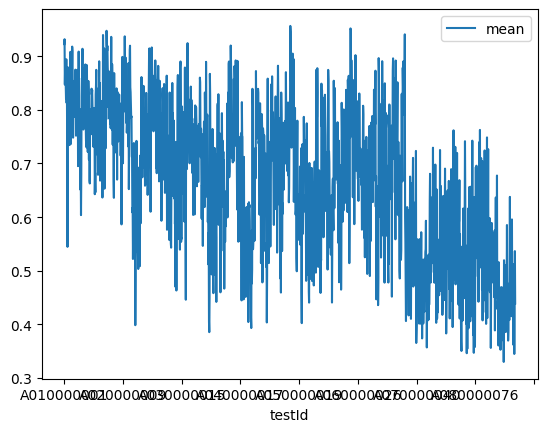

In [ ]:
rate_by_test = df.groupby(["testId"])["answerCode"].agg(["mean"])
rate_by_test.columns = ["mean"]
rate_by_test.sort_values("mean")
rate_by_test.plot()

<AxesSubplot: xlabel='testId'>

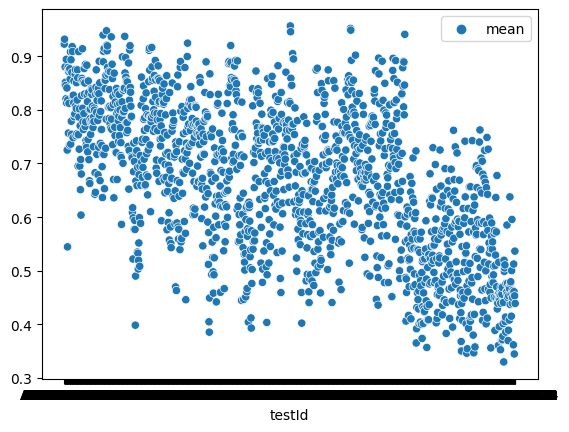

In [ ]:
sns.scatterplot(rate_by_test)